In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
X = iris_frame.iloc[:, :-1]
Y = iris_frame.iloc[:, -1]
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
df1 = iris_frame[['sepal length (cm)', 'sepal width (cm)']]
df1

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


<h1>Sklearn의 cluster 함수인 KMeans import</h1>

<h1>Sepal에 관련된 두가지 feature를 이용한 clustering 학습</h1>


In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
#create model and prediction
N = 3
model = KMeans(n_clusters=N, algorithm='auto')
model.fit(df1)
predict = pd.DataFrame(model.predict(df1))
print(predict.shape)
predict.columns = ['predict']

(150, 1)


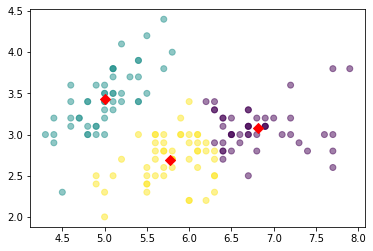

In [33]:
r = pd.concat([df1, predict], axis=1)
plt.scatter(r['sepal length (cm)'], r['sepal width (cm)'], c=r['predict'], alpha=0.5)
centers = pd.DataFrame(model.cluster_centers_, columns=['sepal length (cm)', 'sepal width (cm)'])
center_x = centers['sepal length (cm)']
center_y = centers['sepal width (cm)']
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()
#각각의 색은 cluster를 나타냄
#빨간점은 cluster의 중심

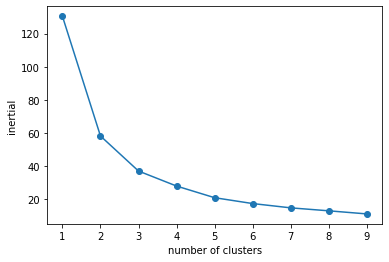

In [35]:
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k,)
    model.fit(df1)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertial')
plt.xticks(ks)
plt.show()

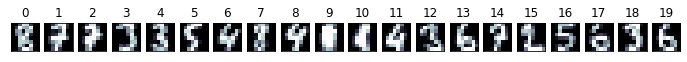

In [49]:
from sklearn.datasets import load_digits
digits = load_digits()
n_image = 20
np.random.seed(0)
#무작위로 이미지 추출
idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]
plt.figure(figsize=(12,1))

for i in range(n_image):
    plt.subplot(1, n_image, i+1)
    plt.imshow(images[i], cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)
    


In [51]:
from scipy.cluster.hierarchy import linkage, dendrogram
#계층분석, cluster끼리의 거리 계산후 군집 결정
Z = linkage(X, 'ward')
Z

array([[ 3.        , 18.        , 23.51595203,  2.        ],
       [13.        , 19.        , 25.27844932,  2.        ],
       [ 1.        , 14.        , 28.67054237,  2.        ],
       [17.        , 21.        , 31.04298096,  3.        ],
       [ 4.        ,  7.        , 31.51190251,  2.        ],
       [ 6.        ,  8.        , 32.54228019,  2.        ],
       [ 9.        , 10.        , 33.36165464,  2.        ],
       [ 0.        , 24.        , 34.51086785,  3.        ],
       [ 2.        , 22.        , 37.03151811,  3.        ],
       [11.        , 26.        , 43.25505751,  3.        ],
       [12.        , 15.        , 45.31004304,  2.        ],
       [16.        , 20.        , 45.36151085,  3.        ],
       [ 5.        , 27.        , 53.54437412,  4.        ],
       [30.        , 32.        , 56.6892112 ,  6.        ],
       [25.        , 29.        , 60.16809786,  5.        ],
       [28.        , 34.        , 66.61618922,  8.        ],
       [31.        , 33.

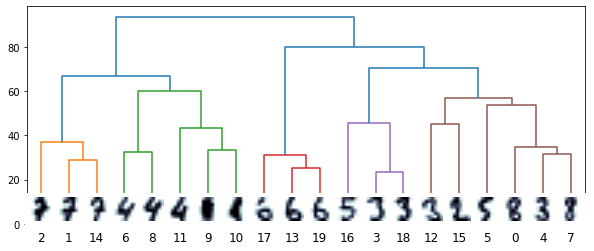

In [69]:
#digit data Hierachical Clustering 시각화

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)
dcoord = np.array(ddata['dcoord'])
icoord = np.array(ddata['icoord'])
leaves = np.array(ddata['leaves'])
#np.argsort -> 배열 sort
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

for i in range(20):
    imagebox = OffsetImage(images[i], cmap=plt.cm.bone_r, interpolation='bilinear', zoom=3)
    ab = AnnotationBbox(imagebox, (label_pos[i], 0), box_alignment=(0.5, -0.1), 
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)
plt.show()

